###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2024 Semester 1

## Assignment 1: Wine quality classification with K-NN


**Student ID(s):**     `1140820`


**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

**Adding proper comments to your code is MANDATORY. **

## 1. K-NN classifier

In [11]:
import pandas as pd
import numpy as np
import random
from scipy.stats import mode

# Load the datasets
train_df = pd.read_csv('winequality-train.csv')
test_df = pd.read_csv('winequality-test.csv')

def knn_classifier(train_data, test_data, k):
    predictions = []
    for index, test_instance in test_data.iterrows():
        # Calculate Euclidean Distance of all training instances to each test instance
        distances = np.sqrt(((train_data.iloc[:, :-1] - test_instance[:-1]) ** 2).sum(axis=1))
        # Get the indices of nearest k neighbours
        neighbors_indices = distances.nsmallest(k).index
        # Check for distance tie with all distances within the array at the k-th nearest neighbor
        kth_distance = distances.iloc[neighbors_indices].iloc[-1]
        tied_for_kth = distances[distances == kth_distance].index
        if len(tied_for_kth) > 1:
            # If there is a tie, randomly select one of the tied instances
            chosen_index = random.choice(tied_for_kth.tolist()) # Convert to list to allow use of random.choice
            neighbors_indices = neighbors_indices.tolist() # Convert to list to allow mutation
            neighbors_indices[-1] = chosen_index
            neighbors_indices = pd.Index(neighbors_indices) # Convert back to Index to keep style
        # Get the labels of nearest k neighbours
        neighbor_labels = train_data.iloc[neighbors_indices, -1]
        # Majority vote to determine label
        most_common_label, count = mode(neighbor_labels, keepdims=True)
        if len(most_common_label) == 1:
            label = most_common_label[0]
        else:
            label = train_data.iloc[distances.idxmin(), -1]
        # Add the predicted label to the list of predictions
        predictions.append(label)
    return predictions

# Set the number of neighbors
k = 5

# Make sure train_df and test_df are read in at the start
predicted_labels = knn_classifier(train_df, test_df.head(), k)

# Return the predicted labels
predicted_labels

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,


## 2. 1-NN classification

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

In [2]:
from sklearn.metrics import accuracy_score

# Using k=1 for 1-NN classification
onenn_predicted_labels = knn_classifier(train_df, test_df, 1)

onenn_predicted_labels

# Calculate accuracy for 1-NN
accuracy = accuracy_score(test_df.iloc[:,-1], onenn_predicted_labels)

accuracy

0.7644444444444445

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier 
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(train_df.drop('quality', axis=1), train_df['quality'])

# Predict the labels for the test data
test_predictions = knn.predict(test_df.drop('quality', axis=1))

# Calculate the accuracy of the predictions
accuracy = accuracy_score(test_df['quality'], test_predictions)
accuracy


0.7414814814814815

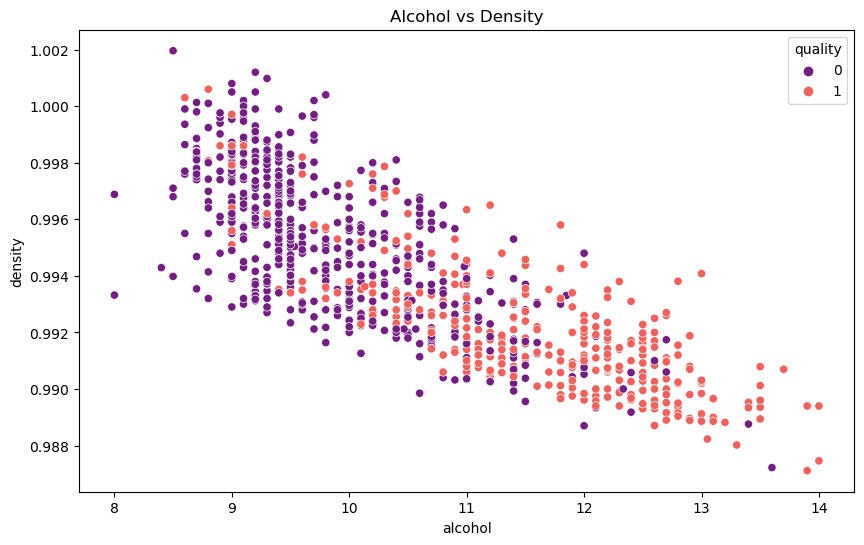

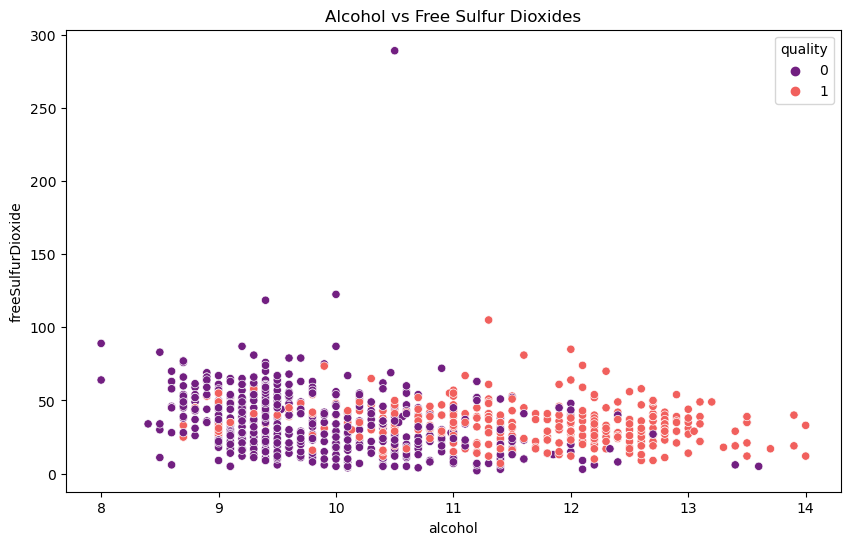

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
#Sample a random subset of the data for easier visualization
sampled_df = train_df.sample(n=1000, random_state=5)

#Creating multiple scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='density', hue='quality', data=sampled_df, palette='magma')
plt.title('Alcohol vs Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='freeSulfurDioxide', hue='quality', data=sampled_df, palette='magma')
plt.title('Alcohol vs Free Sulfur Dioxides')
plt.show()


## 3. Normalization

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

In [5]:
# Define min-max scaling function
def min_max_scale(df):
    return (df - df.min()) / (df.max() - df.min())

# Define standardization function
def standardize(df):
    return (df - df.mean()) / df.std()

# Apply min-max scaling and standardization to the training data
train_df_min_max_scaled = min_max_scale(train_df.iloc[:, :-1])
train_df_standardized = standardize(train_df.iloc[:, :-1])

# Apply the same transformations to the test data using training data parameters
test_df_min_max_scaled = (test_df.iloc[:, :-1] - train_df.iloc[:, :-1].min()) / (train_df.iloc[:, :-1].max() - train_df.iloc[:, :-1].min())
test_df_standardized = (test_df.iloc[:, :-1] - train_df.iloc[:, :-1].mean()) / train_df.iloc[:, :-1].std()

# Join back label columns
train_df_min_max_scaled_with_quality = pd.concat([train_df_min_max_scaled, train_df['quality']], axis=1)
test_df_min_max_scaled_with_quality = pd.concat([test_df_min_max_scaled, test_df['quality']], axis=1)

train_df_standardized_with_quality = pd.concat([train_df_standardized, train_df['quality']], axis=1)
test_df_standardized_with_quality = pd.concat([test_df_standardized, test_df['quality']], axis=1)

# Perform 1-NN classification with min-max scaled data
predicted_labels_min_max = knn_classifier(train_df_min_max_scaled_with_quality, test_df_min_max_scaled_with_quality, k=1)

# Perform 1-NN classification with standardized data
predicted_labels_standardized = knn_classifier(train_df_standardized_with_quality, test_df_standardized_with_quality, k=1)

# Perform 1-NN classification with unnormalized data
predicted_labels_unnormalized = knn_classifier(train_df, test_df, k=1)

# Calculate accuracies
accuracy_min_max = accuracy_score(test_df['quality'], predicted_labels_min_max)
accuracy_standardized = accuracy_score(test_df['quality'], predicted_labels_standardized)
accuracy_unnormalized = accuracy_score(test_df['quality'], predicted_labels_unnormalized)

output = {
    "Accuracy for Unnormalized Data": accuracy_unnormalized,
    "Accuracy for Min-Max Scaled Data": accuracy_min_max,
    "Accuracy for Standardized Data": accuracy_standardized
}

output

{'Accuracy for Unnormalized Data': 0.7644444444444445,
 'Accuracy for Min-Max Scaled Data': 0.8503703703703703,
 'Accuracy for Standardized Data': 0.8674074074074074}

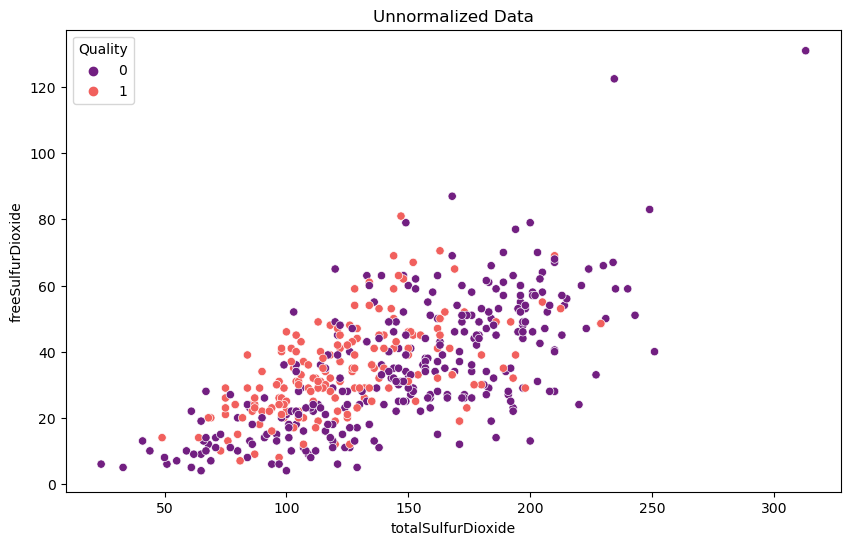

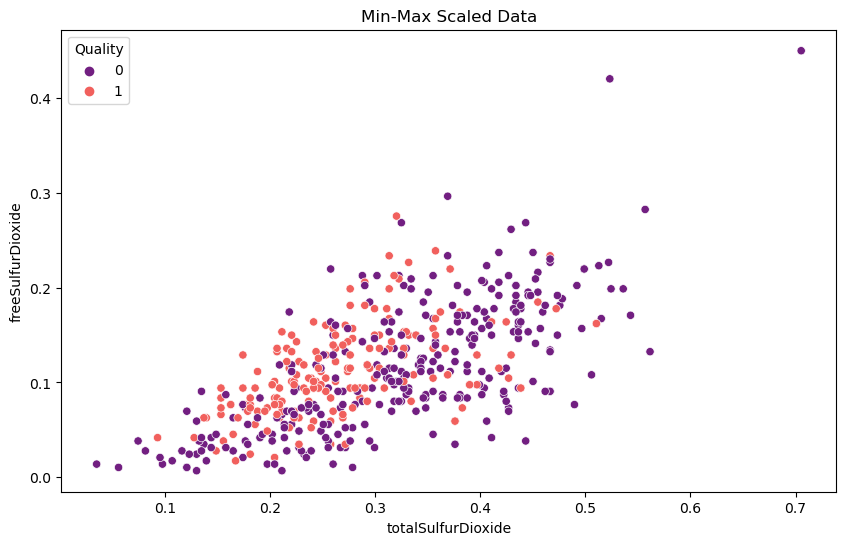

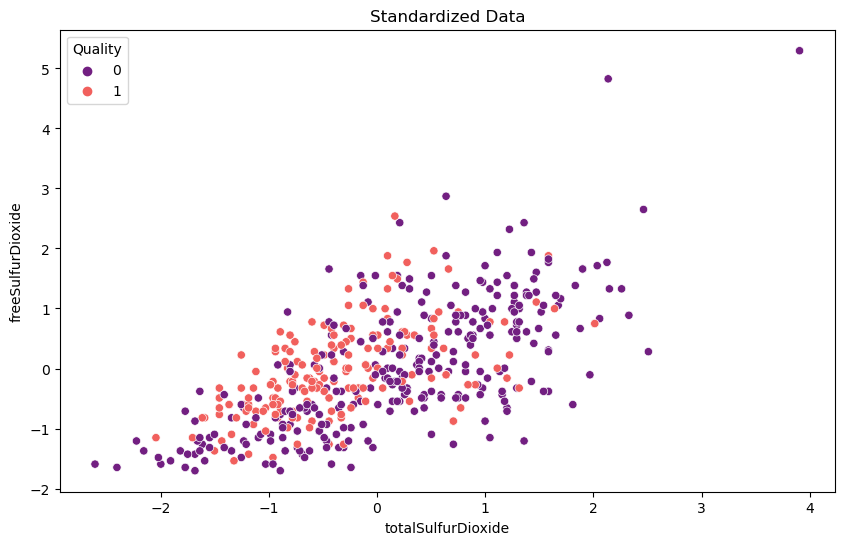

In [6]:
# Sample a random subset of the data for easier visualization
sampled_train_df = train_df.sample(n=500, random_state=1)
sampled_train_df_min_max_scaled = train_df_min_max_scaled_with_quality.sample(n=500, random_state=1)
sampled_train_df_standardized = train_df_standardized_with_quality.sample(n=500, random_state=1)

# Plotting the scatterplot for Unnormalized data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sampled_train_df.columns[6], y=sampled_train_df.columns[5], hue='quality', data=sampled_train_df, palette='magma')
plt.title('Unnormalized Data')
plt.xlabel(sampled_train_df.columns[6])
plt.ylabel(sampled_train_df.columns[5])
plt.legend(title='Quality')
plt.show()

# Plotting the scatterplot for Min-Max Scaled data 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sampled_train_df_min_max_scaled.columns[6], y=sampled_train_df_min_max_scaled.columns[5], hue='quality', data=sampled_train_df_min_max_scaled, palette='magma')
plt.title('Min-Max Scaled Data')
plt.xlabel(sampled_train_df_min_max_scaled.columns[6])
plt.ylabel(sampled_train_df_min_max_scaled.columns[5])
plt.legend(title='Quality')
plt.show()

# Plotting the scatterplot for Standardized data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sampled_train_df_standardized.columns[6], y=sampled_train_df_standardized.columns[5], hue='quality', data=sampled_train_df_standardized, palette='magma')
plt.title('Standardized Data')
plt.xlabel(sampled_train_df_standardized.columns[6])
plt.ylabel(sampled_train_df_standardized.columns[5])
plt.legend(title='Quality')
plt.show()

## 4. Model extensions

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

### 4.1
Compare the performance of your best 1-NN model from Question 3 to a Gaussian naive Bayes model on this dataset (you may use library functions to implement the Gaussian naive Bayes model). In your write-up, state the accuracy of the naive Bayes model and identify instances where the two models disagree. Why do the two models classify these instances differently?

In [7]:
from sklearn.naive_bayes import GaussianNB

# Best performing 1-NN
print(accuracy_standardized)

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(train_df.iloc[:, :-1], train_df['quality'])

# Predict the response for test dataset
predicted_labels_gnb = gnb.predict(test_df.iloc[:, :-1])

# Calculate accuracy
accuracy_gnb = accuracy_score(test_df['quality'], predicted_labels_gnb)
print(accuracy_gnb)

# Find instances where predictions disagree
disagreements = test_df[predicted_labels_gnb != predicted_labels_standardized]

# Create a DataFrame with index, true label, 1-NN prediction, and GNB prediction
comparison_table = pd.DataFrame({
    'Index': test_df.index,
    'True Label': test_df['quality'],
    '1-NN Prediction': predicted_labels_standardized,
    'GNB Prediction': predicted_labels_gnb
})

# Filter the comparison table to only include rows where 1-NN and GNB predictions disagree
comparison_table_disagreements = comparison_table[comparison_table['GNB Prediction'] != comparison_table['True Label']]

# Display the DataFrame with disagreements
comparison_table_disagreements.head()
#comparison_table_disagreements.count()

0.8674074074074074
0.7777777777777778


,Index,True Label,1-NN Prediction,GNB Prediction
0,0,0,0,1
6,6,0,1,1
7,7,1,0,0
27,27,0,0,1
29,29,1,1,0


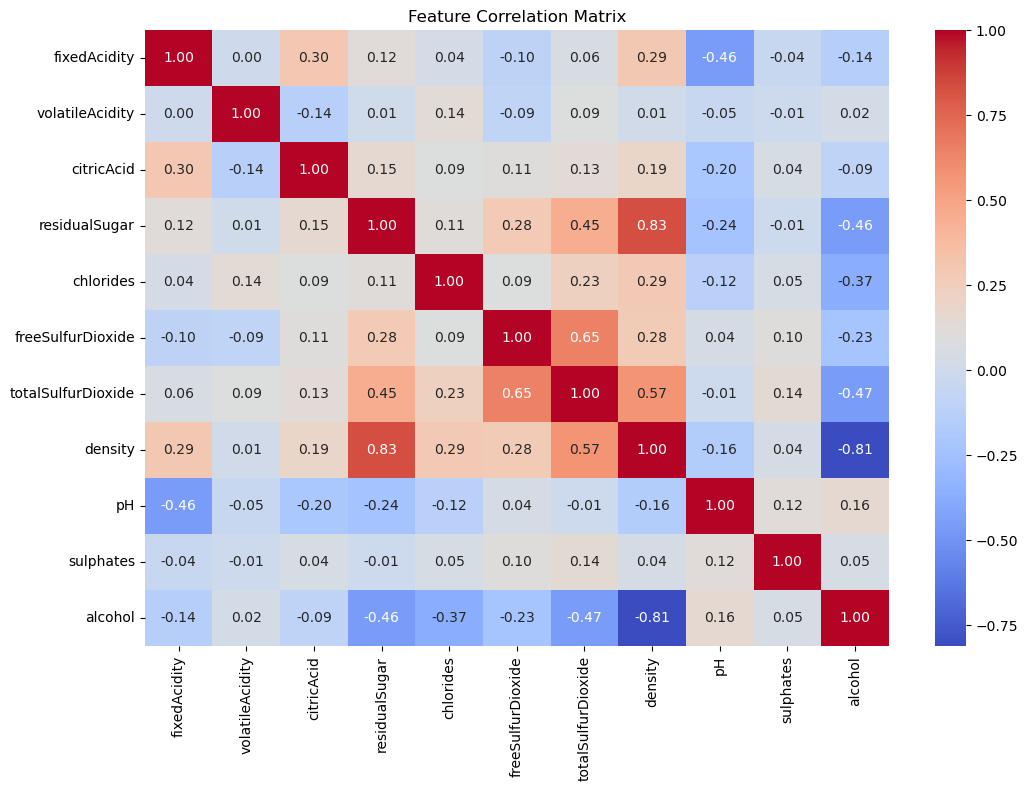

In [8]:
# Calculate the correlation matrix
correlation_matrix = train_df.iloc[:, :-1].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

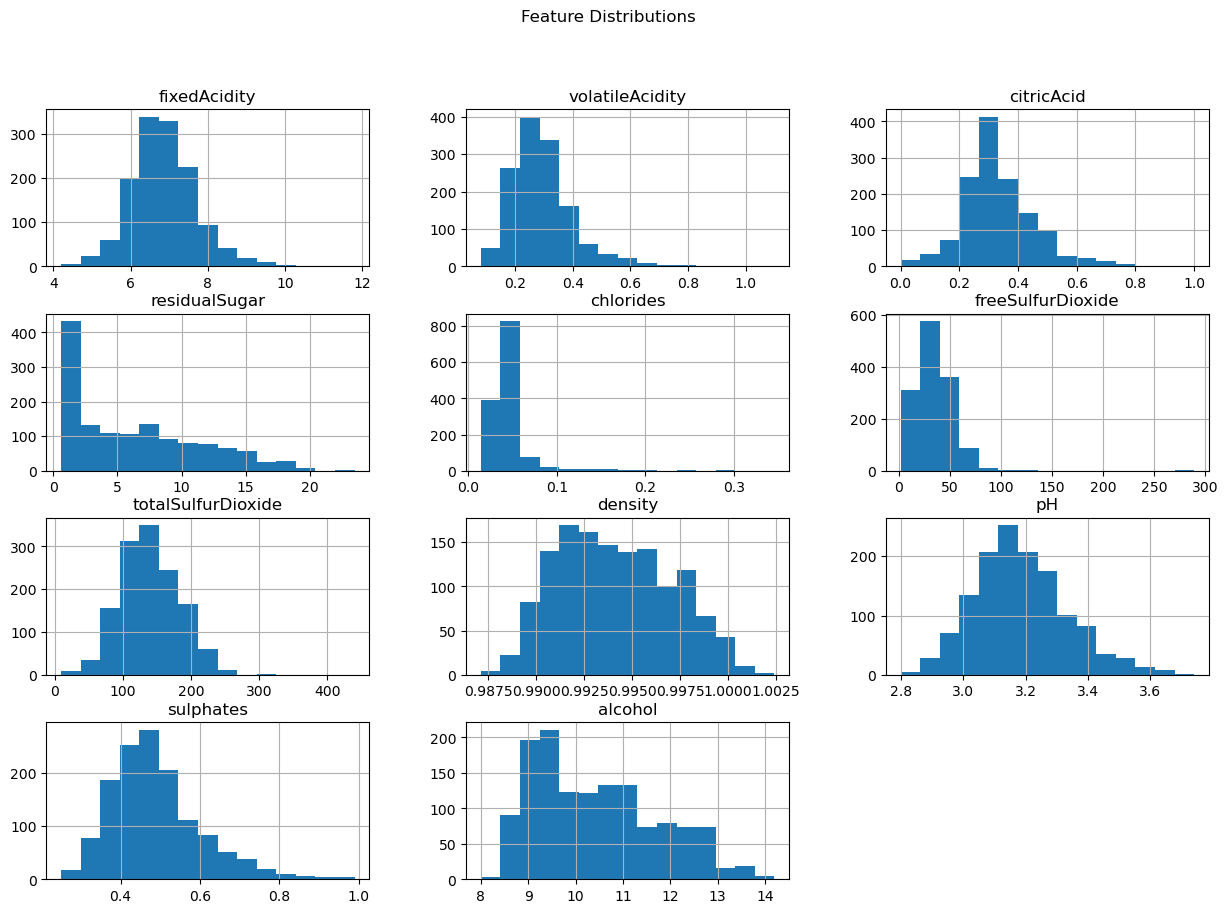

In [9]:
# Plot histograms for each feature to examine distributions
train_df.iloc[:, :-1].hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle("Feature Distributions")
plt.show()

In [10]:
correlated_features = [('density', 'residualSugar'), ('density', 'alcohol')]
misclassified_indices = [0, 27, 29]

# Print the feature values for misclassified instances
for feature_pair in correlated_features:
    print(test_df_standardized_with_quality.loc[misclassified_indices, feature_pair])

# Calculate Conditional Probabilities
probabilities = gnb.predict_proba(test_df.iloc[:, :-1].loc[misclassified_indices])

predicted_labels_standardized_series = pd.Series(predicted_labels_standardized, index=test_df.index)
predicted_labels_gnb_series = pd.Series(predicted_labels_gnb, index=test_df.index)
    
# Create a DataFrame to summarize the information
summary_table = pd.DataFrame({
    'Instance': misclassified_indices,
    'Alcohol': test_df_standardized_with_quality['alcohol'].loc[misclassified_indices],
    'Density': test_df_standardized_with_quality['density'].loc[misclassified_indices],
    'ResidualSugar': test_df_standardized_with_quality['residualSugar'].loc[misclassified_indices],
    'GNB Prediction': predicted_labels_gnb_series.loc[misclassified_indices],
    'GNB Prob Class 0': probabilities[:, 0],
    'GNB Prob Class 1': probabilities[:, 1]
})

# Display the summary table
summary_table

     density  residualSugar
0  -1.119766      -0.987701
27 -0.036223       0.126474
29  0.573269       0.246925
     density   alcohol
0  -1.119766  1.206965
27 -0.036223  0.045611
29  0.573269 -0.573778


,Instance,Alcohol,Density,ResidualSugar,GNB Prediction,GNB Prob Class 0,GNB Prob Class 1
0,0,1.206965,-1.119766,-0.987701,1,0.016657,0.983343
27,27,0.045611,-0.036223,0.126474,1,0.412556,0.587444
29,29,-0.573778,0.573269,0.246925,0,0.768315,0.231685
